# Example Process Mining Visualisations

This example uses an example CSV to demonstrate some of the visualisation capabilities of the Pm4Py library.

In [ ]:
!pip install pm4py

In [36]:
import sys

import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer

# process mining 
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

# viz
from pm4py.visualization.petrinet import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization

# misc 
from pm4py.objects.conversion.process_tree import converter as pt_converter

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [39]:
# Load the CSV and convert to a log
df = pd.read_csv('running-example.csv', parse_dates=['time:timestamp'])
log = log_converter.apply(df)
display(df.head(10))
display(list(df['Activity'].unique()))

,Activity,Costs,Resource,case:concept:name,case:creator,concept:name,org:resource,time:timestamp
0,register request,50,Pete,3,Fluxicon Nitro,register request,Pete,2010-12-30 14:32:00+01:00
1,examine casually,400,Mike,3,Fluxicon Nitro,examine casually,Mike,2010-12-30 15:06:00+01:00
2,check ticket,100,Ellen,3,Fluxicon Nitro,check ticket,Ellen,2010-12-30 16:34:00+01:00
3,decide,200,Sara,3,Fluxicon Nitro,decide,Sara,2011-01-06 09:18:00+01:00
4,reinitiate request,200,Sara,3,Fluxicon Nitro,reinitiate request,Sara,2011-01-06 12:18:00+01:00
5,examine thoroughly,400,Sean,3,Fluxicon Nitro,examine thoroughly,Sean,2011-01-06 13:06:00+01:00
6,check ticket,100,Pete,3,Fluxicon Nitro,check ticket,Pete,2011-01-08 11:43:00+01:00
7,decide,200,Sara,3,Fluxicon Nitro,decide,Sara,2011-01-09 09:55:00+01:00
8,pay compensation,200,Ellen,3,Fluxicon Nitro,pay compensation,Ellen,2011-01-15 10:45:00+01:00
9,register request,50,Mike,2,Fluxicon Nitro,register request,Mike,2010-12-30 11:32:00+01:00


['register request',
 'examine casually',
 'check ticket',
 'decide',
 'reinitiate request',
 'examine thoroughly',
 'pay compensation',
 'reject request']

## Alpha Miner

Creates a Petri net

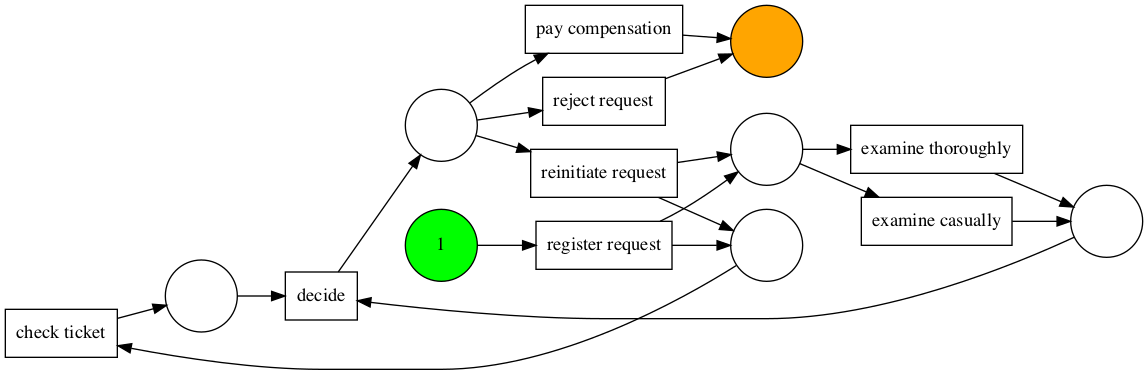

In [40]:
net, initial_marking, final_marking = alpha_miner.apply(log)

gviz = pn_visualizer.apply(net, 
                           initial_marking, 
                           final_marking, parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}, 
                           variant=pn_visualizer.Variants.FREQUENCY)
pn_visualizer.view(gviz)

## Add Frequencies

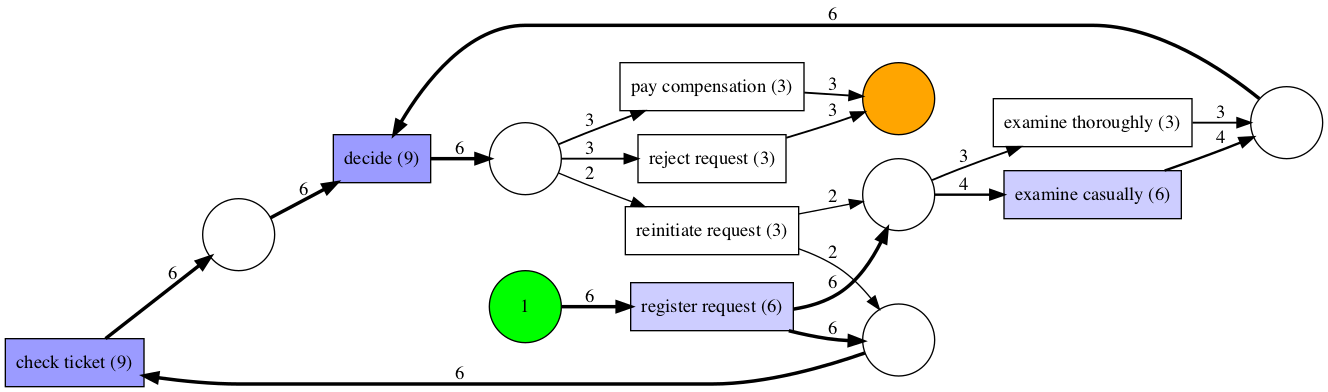

In [41]:
net, initial_marking, final_marking = alpha_miner.apply(log)

# viz
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                           parameters=parameters,
                           variant=pn_visualizer.Variants.FREQUENCY,
                           log=log)
pn_visualizer.view(gviz)
pn_visualizer.save(gviz, "alpha_miner_petri_net.png")

## Directly-Follows Graph

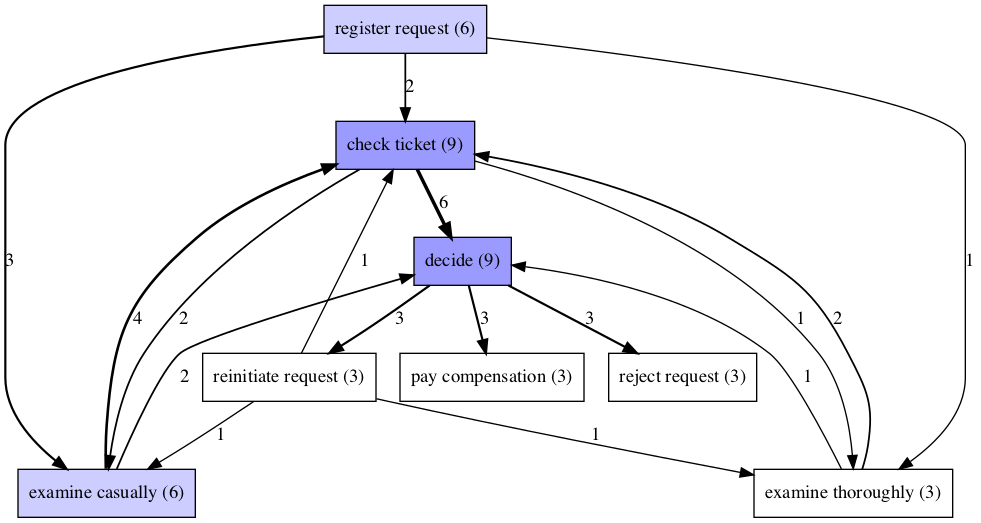

In [42]:
dfg = dfg_discovery.apply(log)

# viz
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

## Performance Metric (Time)

Decorate the edges with the average time elapsed between nodes.

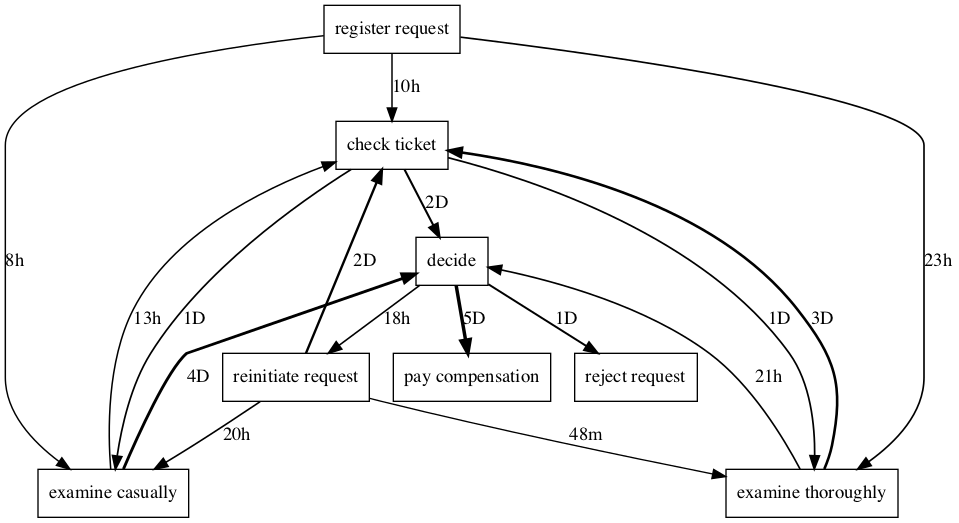

In [43]:
dfg = dfg_discovery.apply(log, variant=dfg_discovery.Variants.PERFORMANCE)

# viz
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.PERFORMANCE)
dfg_visualization.view(gviz)

## Heuristic Miner

Improvement on the alpha miner algorithm. Provides a way to handle noise and finds common constructs.

* Uses frequency
* Detects short loops

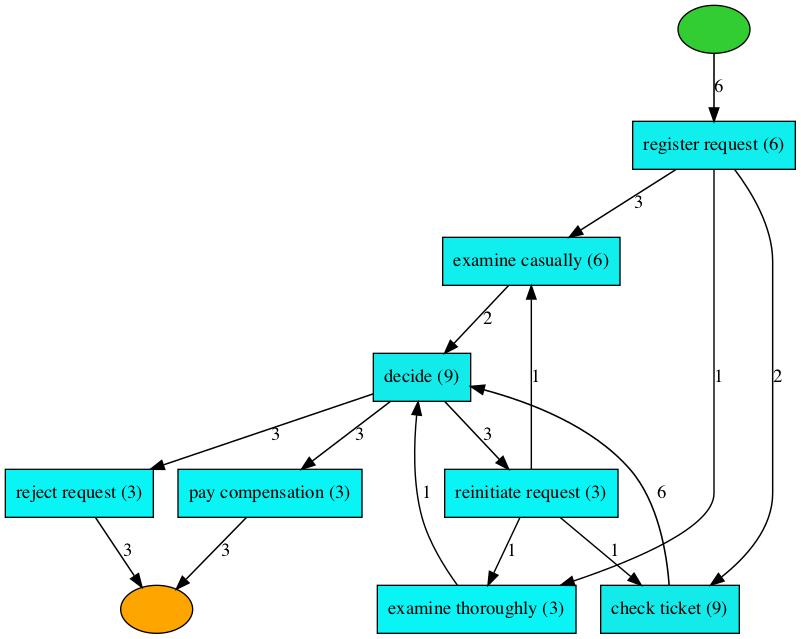

In [44]:
# heuristics miner
heu_net = heuristics_miner.apply_heu(log)

# viz
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

## Convert Heuristics Miner to a Petri Net

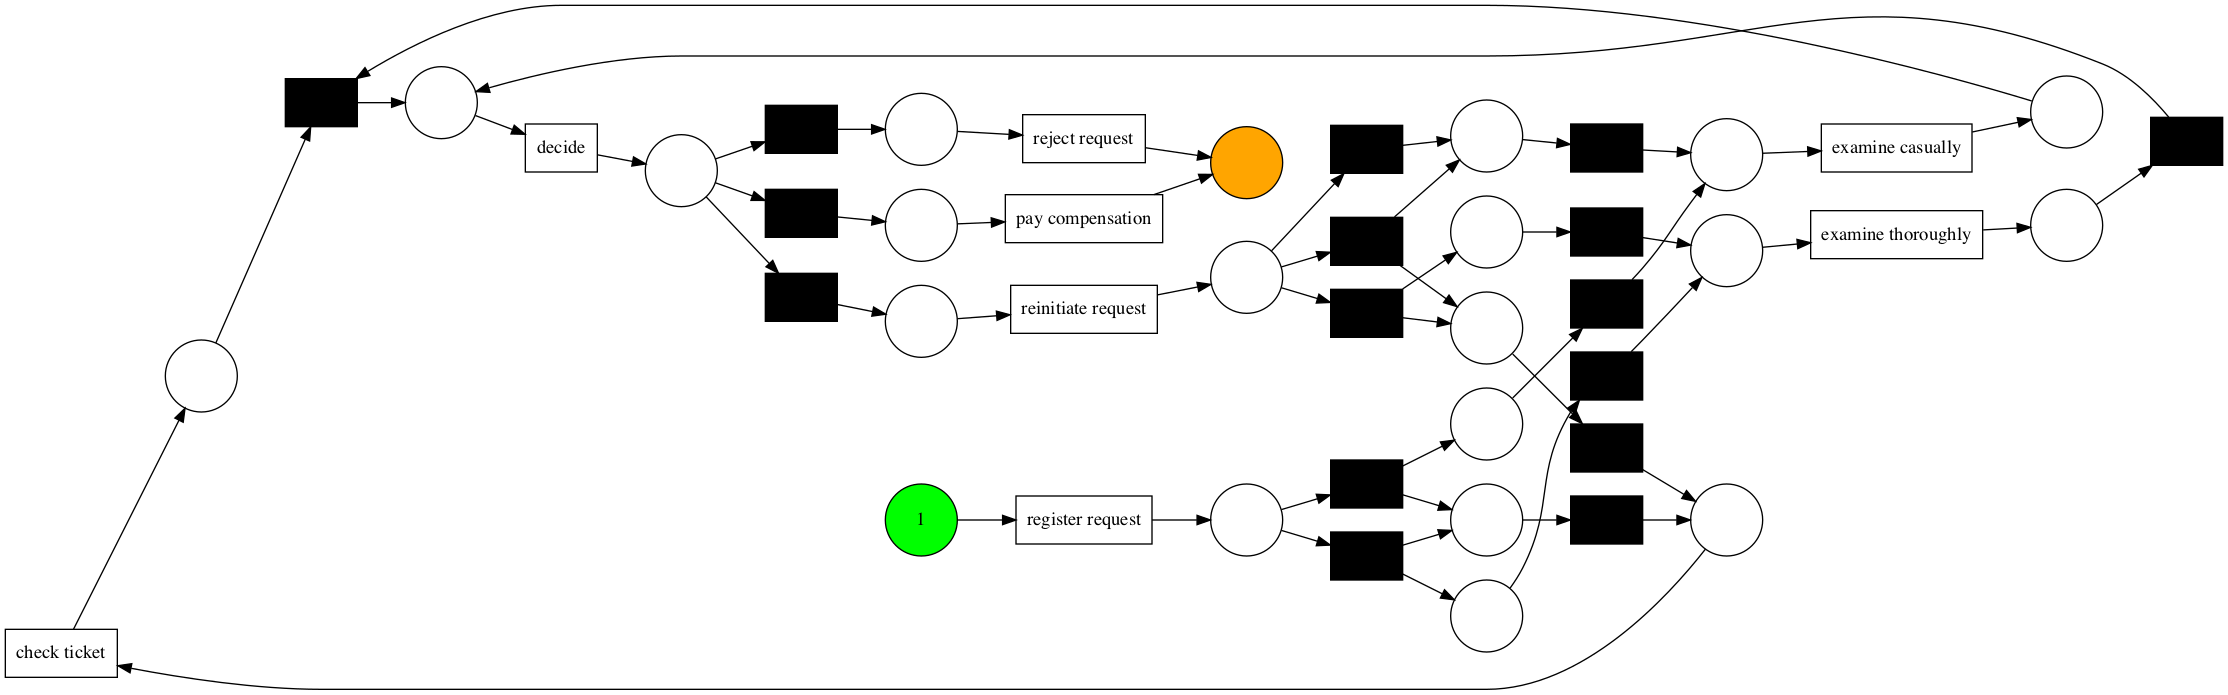

In [45]:
# heuristics miner
net, im, fm = heuristics_miner.apply(log)

# viz
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)

## Inductive Miner

where

* -> is the sequence operator
* X is the exclusive choice
* \* is the loop. 

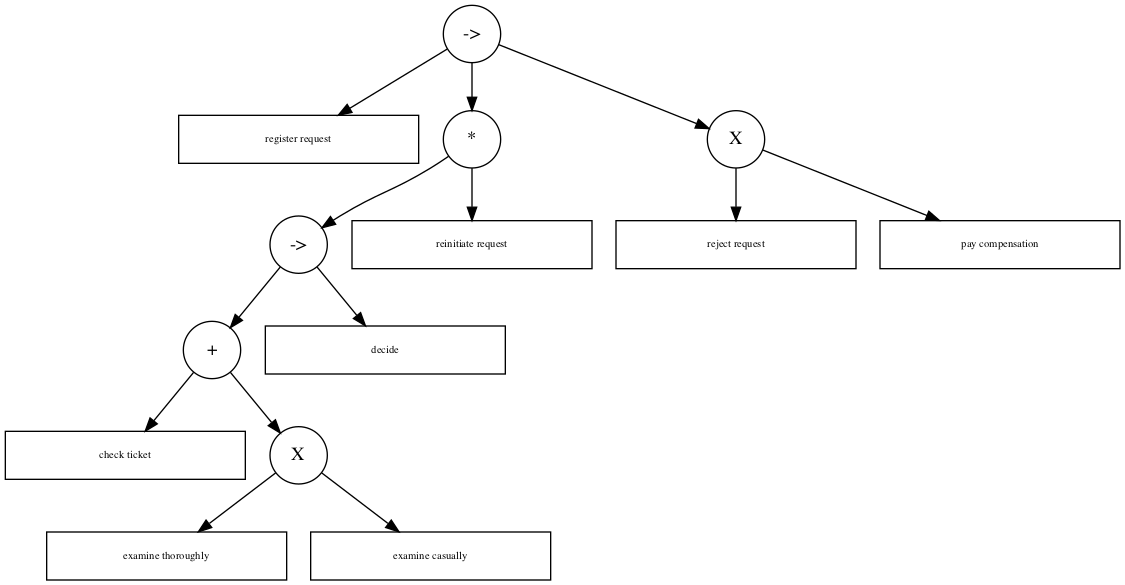

In [46]:
# create the process tree
tree = inductive_miner.apply_tree(log)

# viz
gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)

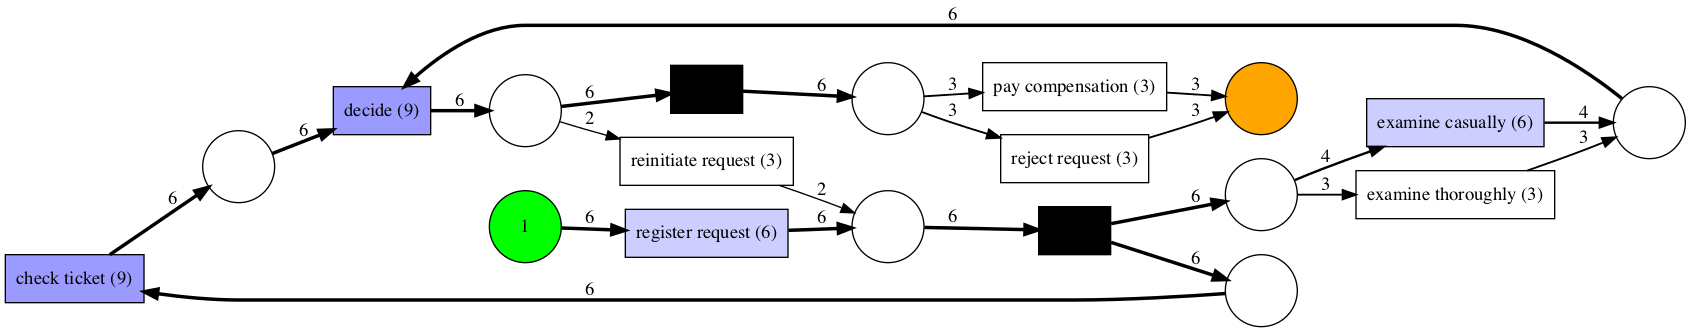

In [47]:
# convert the process tree to a petri net
net, initial_marking, final_marking = pt_converter.apply(tree)

# alternatively, use the inductive_miner to create a petri net from scratch
# net, initial_marking, final_marking = inductive_miner.apply(log)

# viz
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                           parameters=parameters, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log)
pn_visualizer.view(gviz)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecatedWarning: apply is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
  after removing the cwd from sys.path.


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecatedWarning: view is deprecated as of 1.3.0 and will be removed in 2.0.0. Use visualizer module instead.
  """


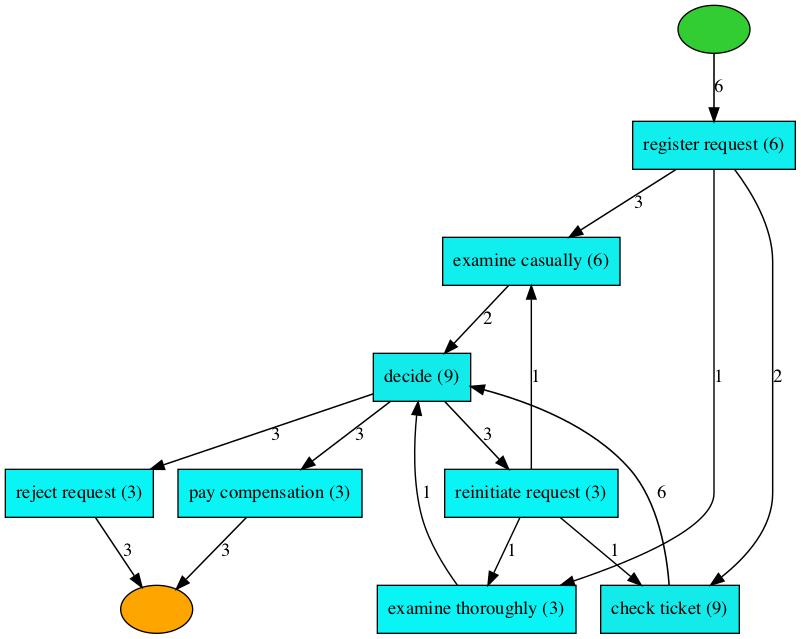

In [50]:
heu_net = heuristics_miner.apply_heu(log, parameters={"dependency_thresh": 0.5})

from pm4py.visualization.heuristics_net import factory as hn_vis_factory
gviz = hn_vis_factory.apply(heu_net)
hn_vis_factory.view(gviz)